## Tutorial 4: Edges and image gradient


=========================================================================================

In this tutorial, we will recall the concepts:

1. Image derivatives
2. Image gradient
3. Sobel vs Prewitt
4. Image Laplacian
5. Canny edge detector
6. Comparison between different edge detectors
7. Edge detection in color images

=========================================================================================


In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from skimage import io
from skimage import img_as_float
from skimage.color import rgba2rgb, rgb2gray
from skimage.transform import rescale

from scipy import ndimage


In [3]:
# Auxiliar functions
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.axis('off')
    
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.axis('off')
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.axis('off')
    
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.axis('off')
    plt.imshow(tigre_x, cmap='gray')
    
    fig.add_subplot(1,3,3)
    plt.axis('off')
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')

def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.axis('off')
    
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.axis('off')
    plt.imshow(tigre2, cmap='gray')
    
    fig.add_subplot(1,4,3)
    plt.axis('off')
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    
    fig.add_subplot(1,4,4)
    plt.axis('off')
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')

## Spatial resolution of color images

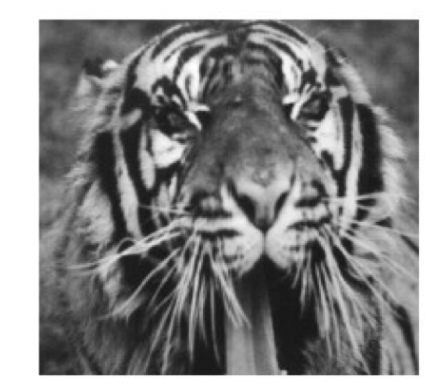

(389, 449, 4)


In [4]:
tigre = io.imread('images/tigre.png')

plt.imshow(tigre)
plt.axis('off')
plt.show()

print(tigre.shape)

**Be Carefull!** This image contains 4 channels, therefore we are working with a **RGBA** image

In [5]:
tigre_f = img_as_float(tigre) ## Convert to float image

tigre_f = rgba2rgb(tigre_f)  ## Convert from RGA to RGB image
tigre_f = rgb2gray(tigre_f)  ## Convert to grayscale image

tigre_f = rescale(tigre_f,.25) #let's accelerate computation

print(tigre_f.shape)
print(tigre_f.dtype)

print(tigre_f.min())
print(tigre_f.max())


(97, 112)
float64
0.09539347625590715
1.0


# Image derivatives

How to obtain the first partial derivative in the direction x?

<img src="images/derivative_x.png" width=400>


<center>
$mask_x = \begin{bmatrix} -1 & 1 \end{bmatrix}$
</center>

In [6]:
mask_x = np.array([[-1,1]])
print(mask_x)

[[-1  1]]


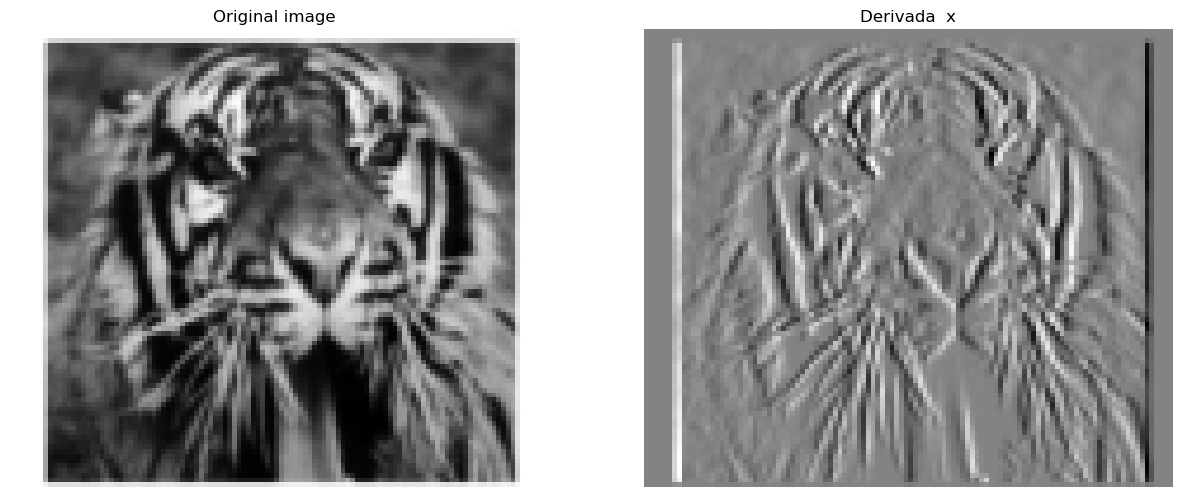

In [7]:
tigre_x = ndimage.convolve(tigre_f,mask_x)

visualize2(tigre_f,tigre_x,'Original image', 'Derivada  x')

Let's compute the vertical derivative:

<center>
$mask_y = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$
</center>

[[-1]
 [ 1]]


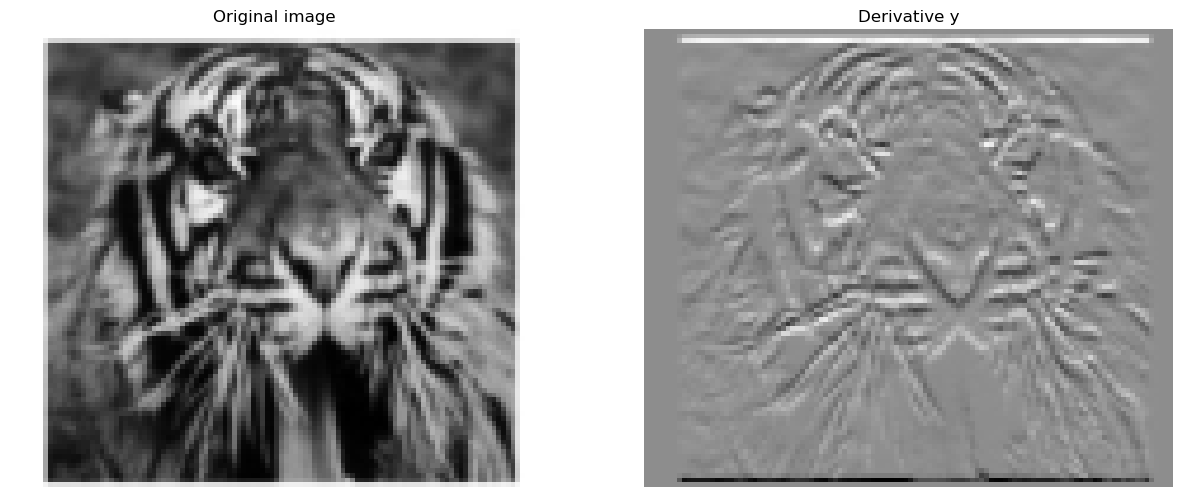

In [8]:
mask_y = np.array([[-1],[1]])
print(mask_y)

tigre_y = ndimage.convolve(tigre_f,mask_y)

visualize2(tigre_f,tigre_y, 'Original image', 'Derivative y')

[[ 1]
 [-1]]


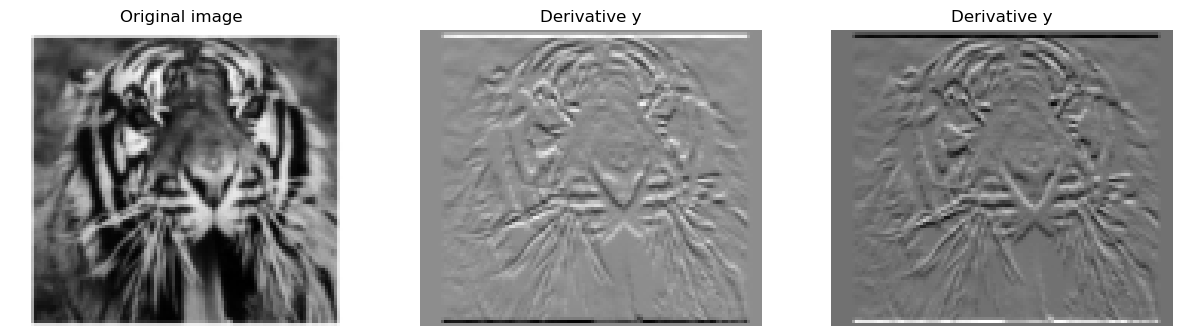

In [10]:
mask_y2 = np.array([[1],[-1]]) #invert y axis
print(mask_y2)

tigre_y2 = ndimage.convolve(tigre_f,mask_y2)

visualize3(tigre_f,tigre_y, tigre_y2, 'Original image', 'Derivative y', 'Derivative y')

What is the difference between tigre_y1 and tigre_y2?

In [ ]:
#Explain it
tigre_y12 = tigre_y+tigre_y2
visualize3(tigre_y, tigre_y2, tigre_y12, 'Derivative y1', 'Derivative y2', 'Derivative y1+y2')

print(tigre_y[0])
print(tigre_y2[0])
print(tigre_y12[0])

What is the difference using masks: $\begin{bmatrix} -1 & 1 \end{bmatrix}$ and $\begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}$?

How to visualize just the edges?

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


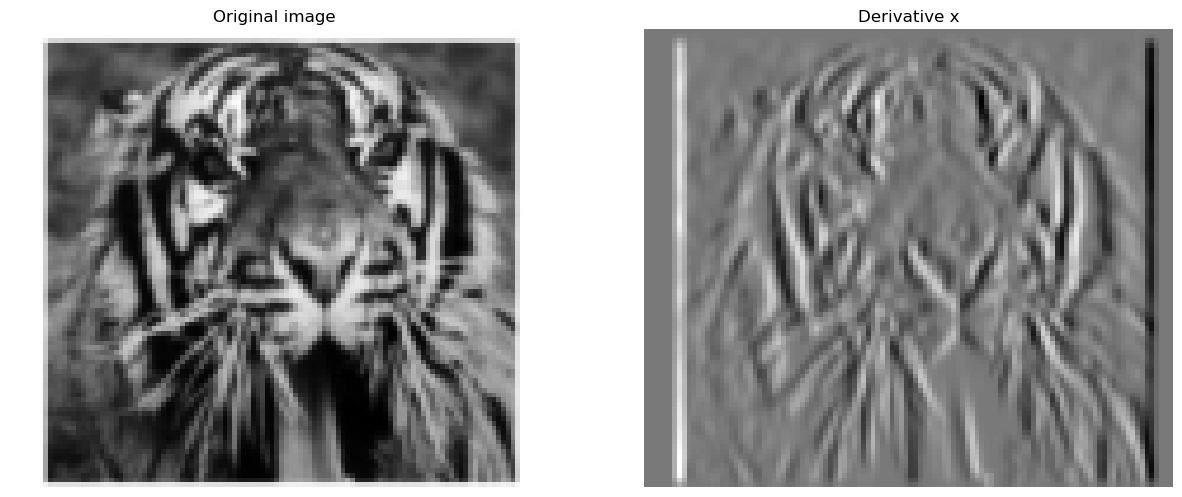

In [12]:
mask_x2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) 
print(mask_x2)

tigre_x22 = ndimage.convolve(tigre_f,mask_x2)

visualize2(tigre_f, tigre_x22, 'Original image', 'Derivative x')

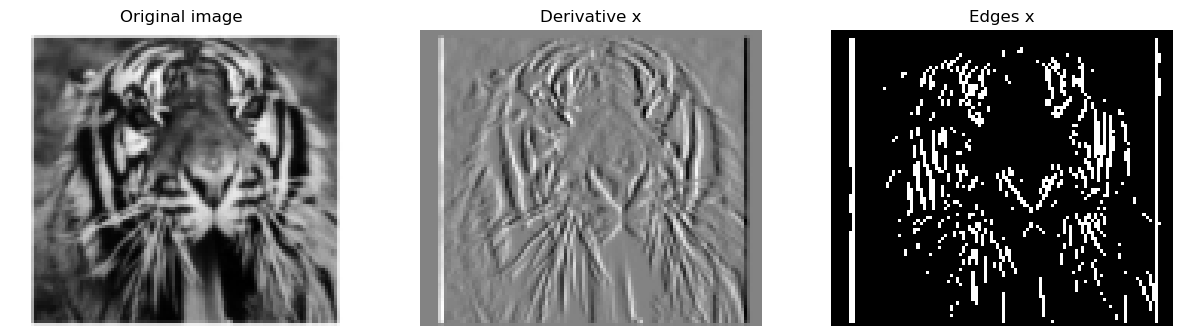

In [13]:
thr = 0.2

tigre_xb = np.abs(tigre_x)>thr  ## np.abs

visualize3(tigre_f,tigre_x, tigre_xb, 'Original image', 'Derivative x', 'Edges x')


Do we get all edges?

How to determine better the threshold?

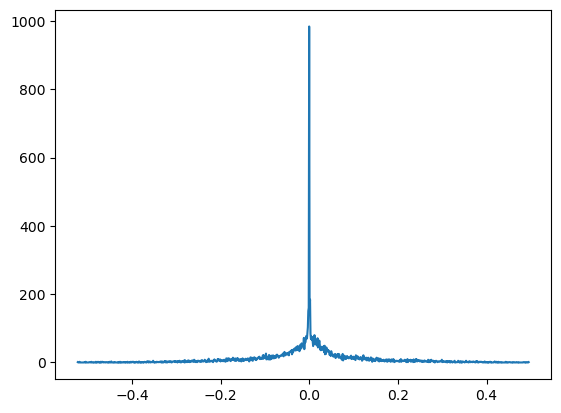

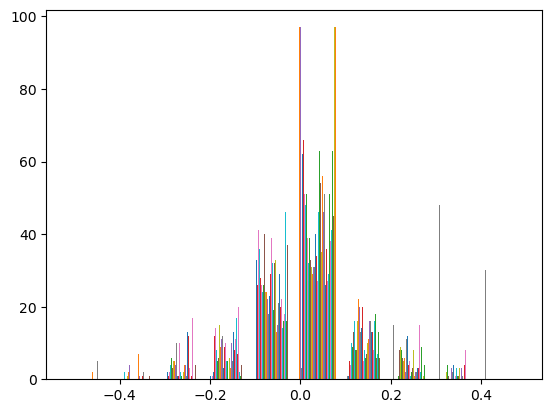

In [14]:
from skimage.exposure import histogram
hst,kak = histogram(tigre_x, nbins=1024)
#plt.bar(hst[1],hst[0])
plt.plot(kak, hst)
plt.show()
plt.hist(tigre_x)
plt.show()

So thr=0.1 probably is a good choice.

## Prewitt and Sobel

Let's define the **Prewitt mask**:

<center>
$\begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}$
</center>

In [16]:
prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_y = np.transpose(prewitt_x)

print(prewitt_x)
print("")
print(prewitt_y)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


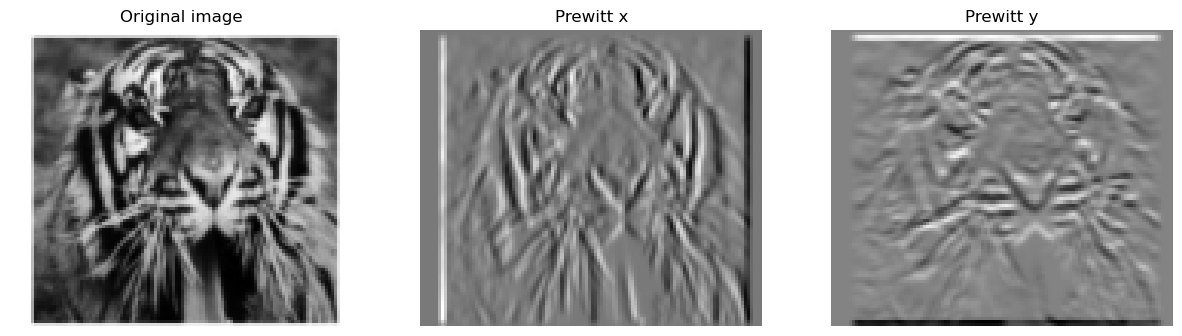

In [18]:
tigre_px = ndimage.convolve(tigre_f,prewitt_x)
tigre_py = ndimage.convolve(tigre_f,prewitt_y)

#visualize
visualize3(tigre_f,tigre_px, tigre_py, 'Original image', 'Prewitt x', 'Prewitt y')


Compare the result of Prewitt with the single mask $\begin{bmatrix} -1 & 1 \end{bmatrix}$

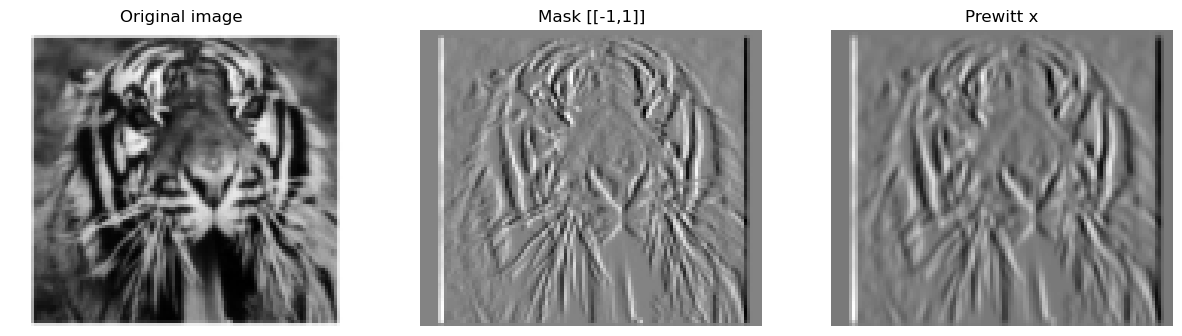

In [23]:
#visualiz
visualize3(tigre_f,tigre_x, tigre_px, 'Original image', 'Mask [[-1,1]]', 'Prewitt x')


We can use [filters.prewitt](https://scikit-image.org/docs/stable/api/skimage.filters.html#prewitt) from  `skimage`:

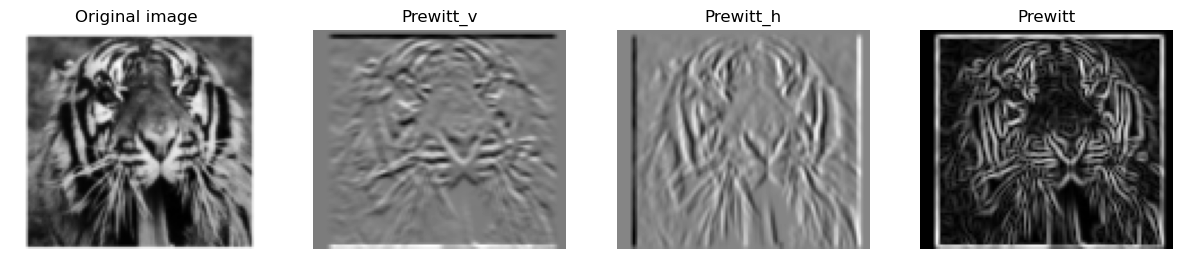

In [21]:
from skimage import filters 

tigre_px2 = filters.prewitt_h(tigre_f)
tigre_py2 = filters.prewitt_v(tigre_f)
tigre_p2  = filters.prewitt(tigre_f)

visualize4(tigre_f,tigre_px2, tigre_py2, tigre_p2, 'Original image', 'Prewitt_v', 'Prewitt_h', 'Prewitt')


Now, check the **Sobel mask**:

<center>
$\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$
</center>

In [17]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.transpose(sobel_x)

print(sobel_x)
print("")
print(sobel_y)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


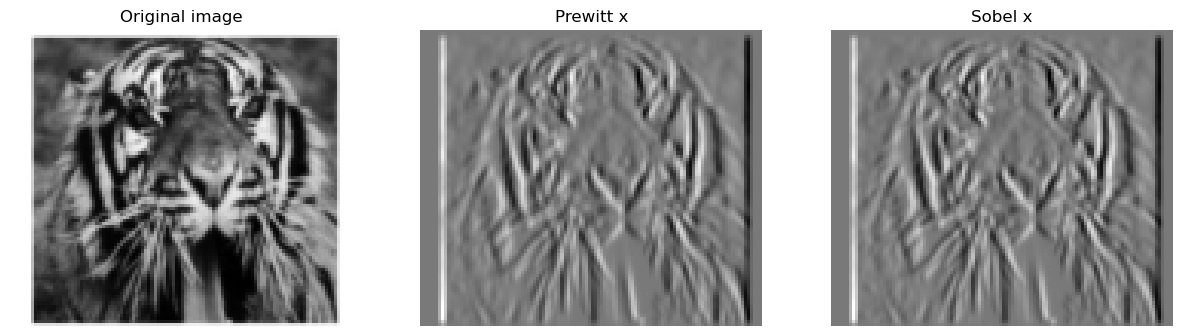

In [20]:
tigre_sx = ndimage.convolve(tigre_f,sobel_x)
tigre_sy = ndimage.convolve(tigre_f,sobel_y)

#visualize
visualize3(tigre_f,tigre_px, tigre_sx, 'Original image', 'Prewitt x', 'Sobel x')


We can use [filters.sobel](https://scikit-image.org/docs/stable/api/skimage.filters.html#sobel) from  `skimage`:

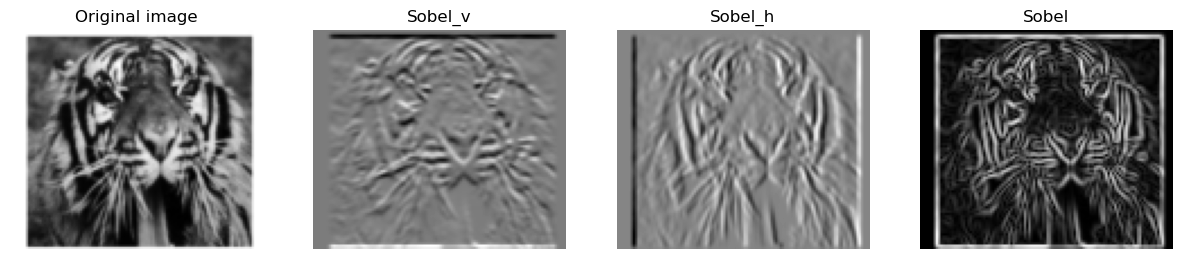

In [22]:
from skimage import filters 

tigre_sx2 = filters.sobel_h(tigre_f)
tigre_sy2 = filters.sobel_v(tigre_f)
tigre_s2  = filters.sobel(tigre_f)

visualize4(tigre_f,tigre_sx2, tigre_sy2, tigre_s2, 'Original image', 'Sobel_v', 'Sobel_h', 'Sobel')


## Second derivatives

<img src="images/second_derivative.png" width=600>

<center>
$mask_x = \begin{bmatrix} 1 & -2 & 1 \end{bmatrix}$
</center>

In [25]:
mask_2dx = np.array([[1,-2,1]])
mask_2dy = np.transpose(mask_2dx)
print(mask_2dx)
print("")
print(mask_2dy)

[[ 1 -2  1]]

[[ 1]
 [-2]
 [ 1]]


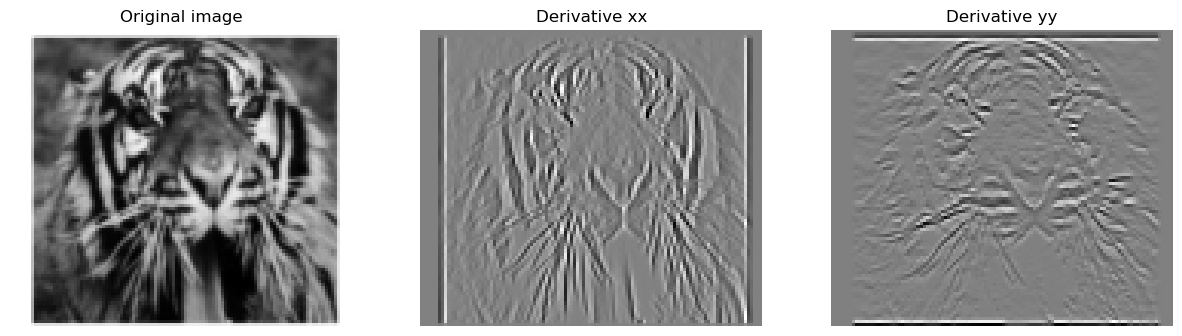

In [26]:

tigre_xx = ndimage.convolve(tigre_f,mask_2dx)
tigre_yy = ndimage.convolve(tigre_f,mask_2dy)

visualize3(tigre_f,tigre_xx, tigre_yy, 'Original image', 'Derivative xx', 'Derivative yy')


How to define the Laplacian mask?

<center>
    $ \begin{bmatrix} 1 & 4 & 1 \\ 4 & -20 & 4 \\ 1 & 4 & 1 \end{bmatrix} $
</center>

[[  1   4   1]
 [  4 -20   4]
 [  1   4   1]]


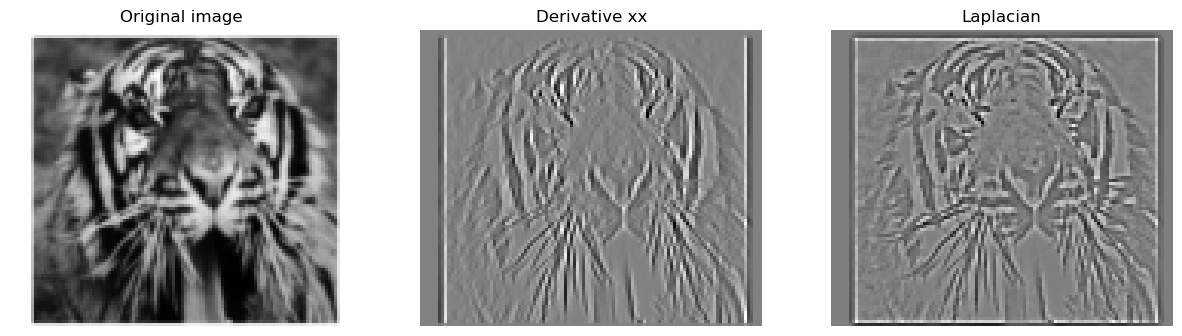

In [27]:
mask_lapl = np.array([[1,4,1],[4,-20,4],[1,4,1]])
print(mask_lapl)

tigre_lapl = ndimage.convolve(tigre_f,mask_lapl)

visualize3(tigre_f,tigre_xx, tigre_lapl, 'Original image', 'Derivative xx', 'Laplacian')


How to get image derivatives by a **Gaussian filter**?

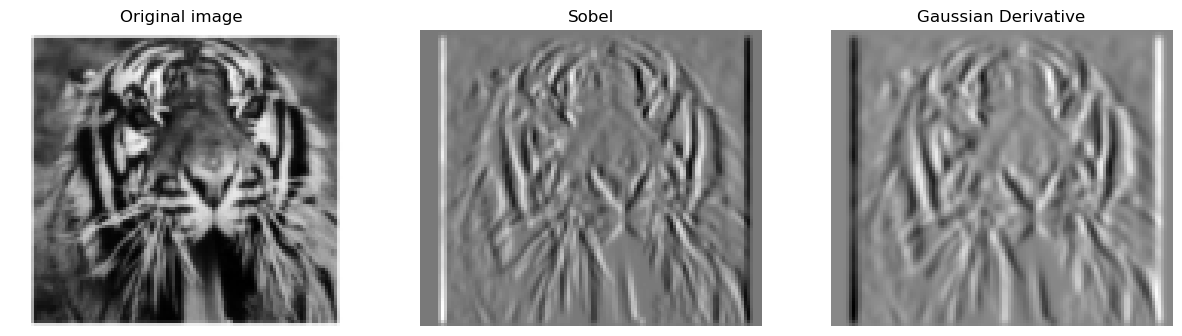

In [29]:
from scipy.ndimage import gaussian_filter

tigre_gx = gaussian_filter(tigre_f,1,order=[0,1])

visualize3(tigre_f,tigre_sx, tigre_gx, 'Original image', 'Sobel', 'Gaussian Derivative')


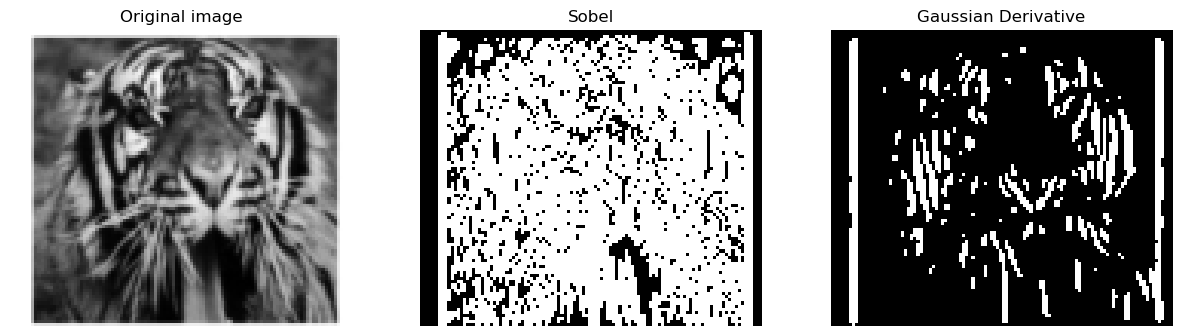

In [48]:
thr=0.1

tigre_sb = np.abs(tigre_sx)>thr

tigre_gb = np.abs(tigre_gx)>thr

visualize3(tigre_f,tigre_sb, tigre_gb, 'Original image', 'Sobel', 'Gaussian Derivative')



How the sigma parameter affects the derivative? 

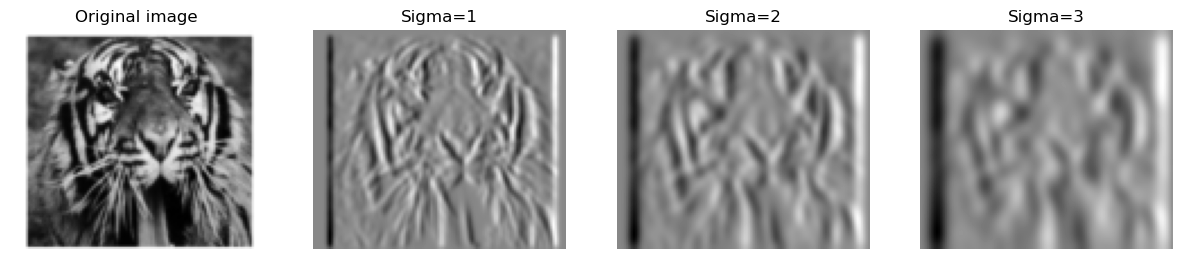

In [31]:
tigre_gx1 = gaussian_filter(tigre_f, 1, order=[0,1])
tigre_gx2 = gaussian_filter(tigre_f, 2, order=[0,1])
tigre_gx3 = gaussian_filter(tigre_f, 3, order=[0,1])

visualize4(tigre_f,tigre_gx1, tigre_gx2,tigre_gx3, 'Original image',  'Sigma=1', 'Sigma=2', 'Sigma=3')




Compute the Laplacian with different sigma parameters:

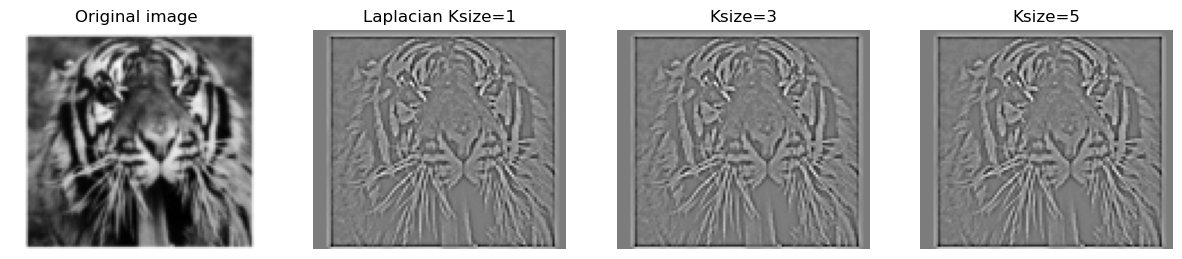

In [50]:
tigre_l1 = filters.laplace(tigre_f)
tigre_l3 = filters.laplace(tigre_f, 3)
tigre_l5 = filters.laplace(tigre_f, 5)

visualize4(tigre_f,tigre_l1, tigre_l3,tigre_l5, 'Original image',  'Laplacian Ksize=1', 'Ksize=3', 'Ksize=5')



What is the Canny edge detector? What are its parameters?

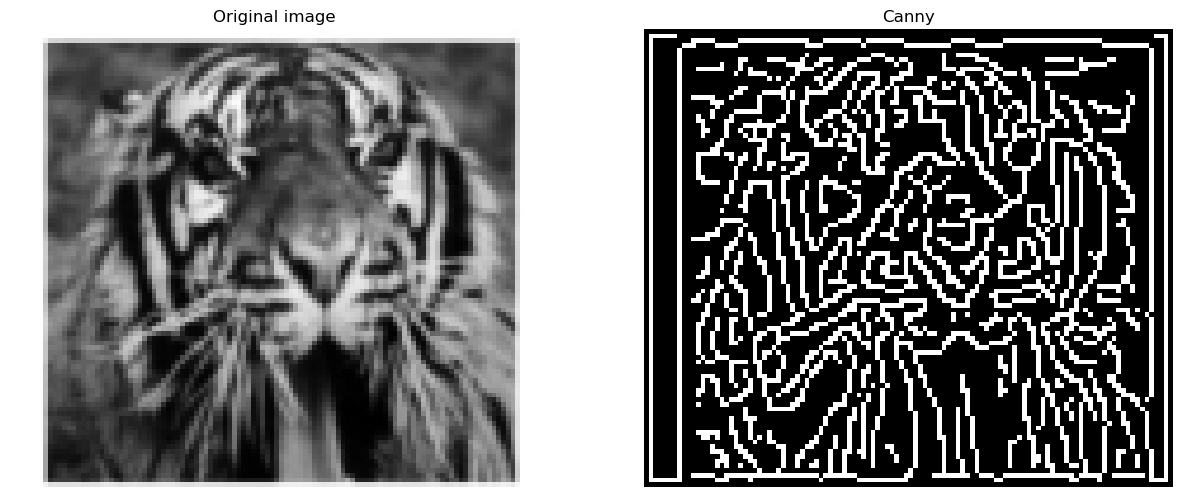

In [33]:
from skimage import feature

tigre_c = feature.canny(tigre_f)

visualize2(tigre_f,tigre_c, 'Original image',  'Canny')

Testing with different sigma parameters

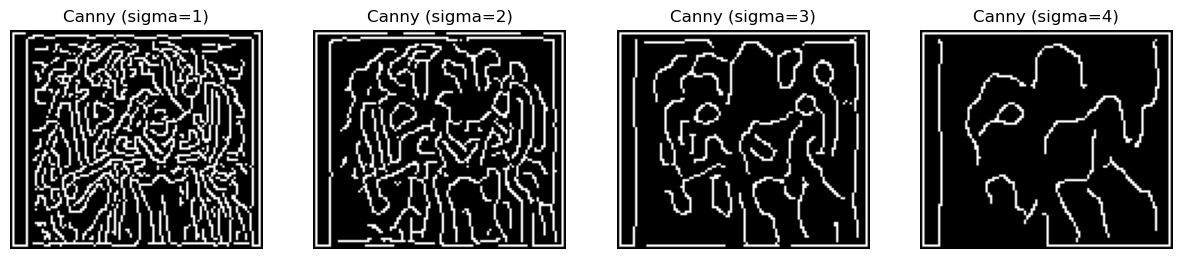

In [34]:
tigre_c1 = feature.canny(tigre_f, sigma=1)
tigre_c3 = feature.canny(tigre_f, sigma=2)

tigre_c5 = feature.canny(tigre_f, sigma=3)
tigre_c9 = feature.canny(tigre_f, sigma=4)

visualize4(tigre_c1,tigre_c3,tigre_c5,tigre_c9,'Canny (sigma=1)','Canny (sigma=2)','Canny (sigma=3)','Canny (sigma=4)')

Explain the following effect:

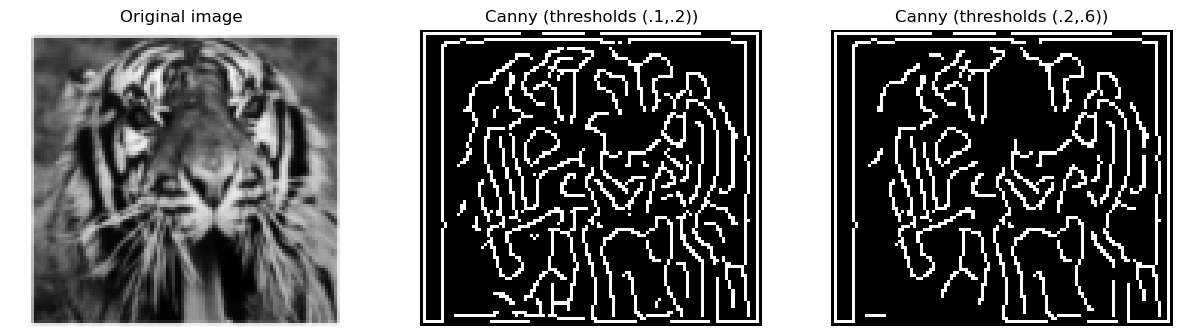

In [35]:
tigre_c512 = feature.canny(tigre_f, sigma=2, low_threshold=0.1, high_threshold=0.2)
tigre_c526 = feature.canny(tigre_f, sigma=2, low_threshold=0.2, high_threshold=0.3)

visualize3(tigre_f,tigre_c512,tigre_c526,'Original image','Canny (thresholds (.1,.2))','Canny (thresholds (.2,.6))')

Let's overlap the contours in order to better map them to the image

(97, 112) (97, 112)


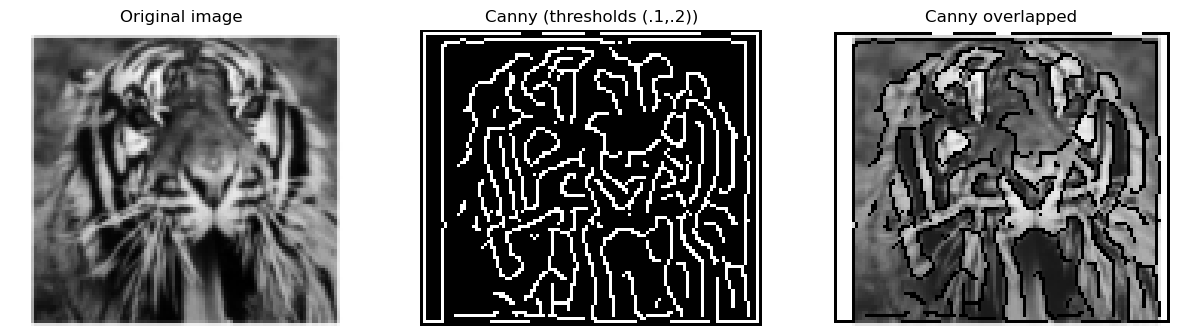

In [36]:
tigre_cim = tigre_f.copy()
print(tigre_cim.shape, tigre_c512.shape)

tigre_cim[tigre_c512] = 0

visualize3(tigre_f,tigre_c512,tigre_cim,'Original image','Canny (thresholds (.1,.2))','Canny overlapped')

What do you expect to be the edges of a color image? Test it on the logo.png image

(575, 523, 4)


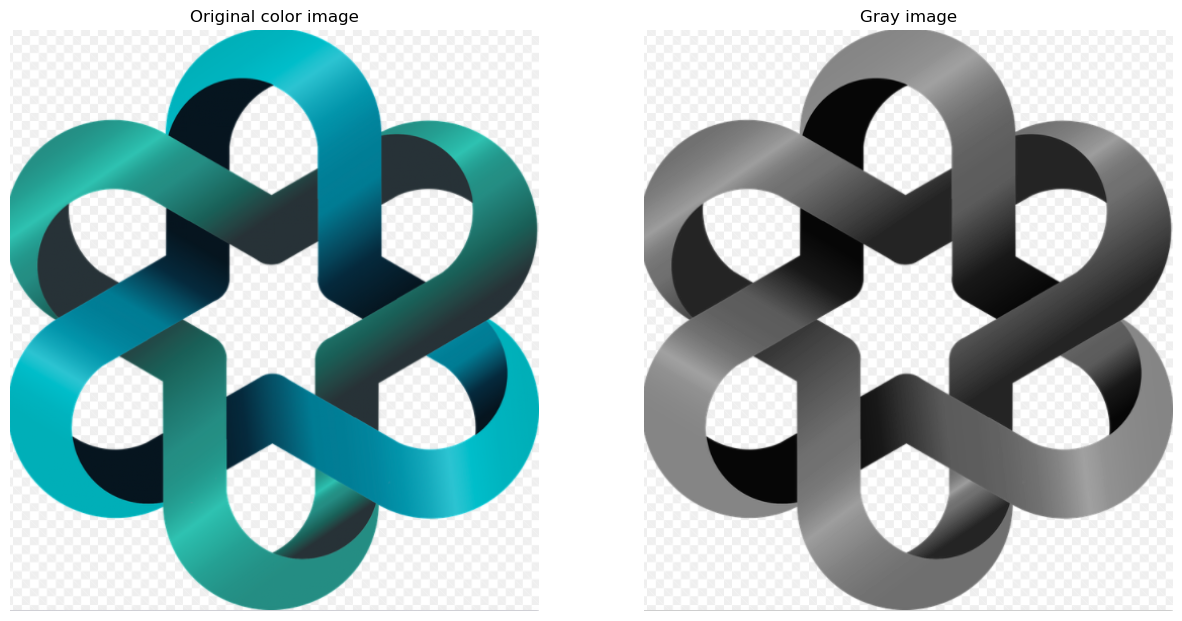

In [37]:
logo = io.imread('images/logo.png')
print(logo.shape)

logo = rgba2rgb(logo)
logo_gr = rgb2gray(logo)

visualize2(logo, logo_gr, 'Original color image', 'Gray image')

In [38]:
logo_canny=feature.canny(logo_gr, sigma=5)

Explain and correct the problem!

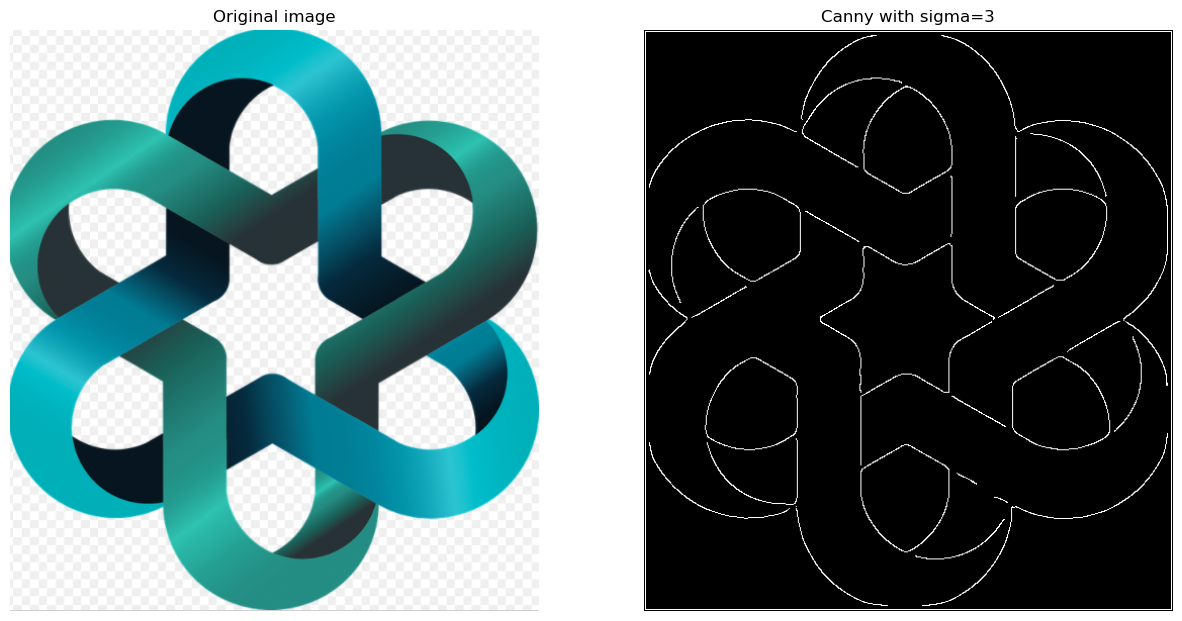

In [39]:
logo_canny = feature.canny(logo_gr, sigma=3)
visualize2(logo,logo_canny, 'Original image', 'Canny with sigma=3')

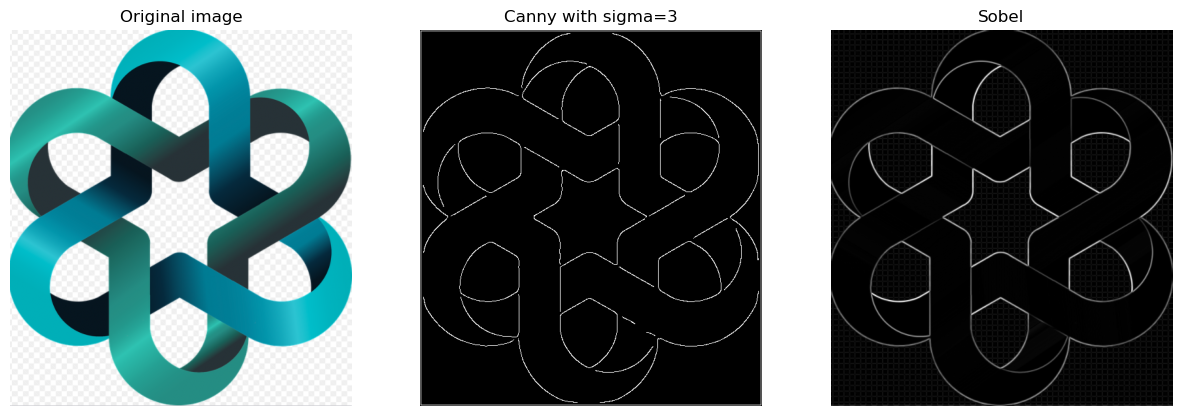

In [40]:
logo_sobel = filters.sobel(logo_gr)
visualize3(logo,logo_canny, logo_sobel, 'Original image', 'Canny with sigma=3', 'Sobel')

In [70]:
import math

import time

logo_gaussian01 = gaussian_filter(logo_gr,sigma=2,order=[0,1])
logo_gaussian10 = gaussian_filter(logo_gr,sigma=2,order=[1,0])

def magnitude(m1,m2):
    res=np.zeros(m1.shape)
    for i in range(m1.shape[0]):
        for j in range(m1.shape[1]):
            res[i,j]=math.sqrt(m1[i,j]*m1[i,j]+m2[i,j]*m2[i,j])
    return(res)

start_time = time.time()

logo_gaussian=magnitude(logo_gaussian01,logo_gaussian10)
print(logo_gaussian.shape)

print("--- %s seconds ---" % (time.time() - start_time))

(575, 523)
--- 0.15874147415161133 seconds ---


In [71]:
start_time = time.time()

logo_gaussian_2 = np.sqrt(logo_gaussian01**2 + logo_gaussian10**2)
print(logo_gaussian_2.shape)

print("--- %s seconds ---" % (time.time() - start_time))

(575, 523)
--- 0.0016703605651855469 seconds ---


In [66]:
np.array_equal(logo_gaussian_2, logo_gaussian)

True

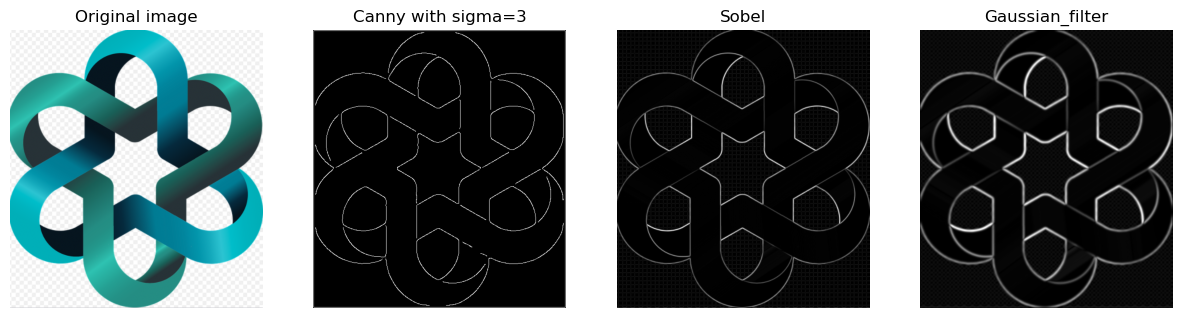

In [42]:
visualize4(logo,logo_canny, logo_sobel, np.abs(logo_gaussian), 'Original image', 'Canny with sigma=3', 'Sobel', 'Gaussian_filter')

(114, 111, 3)


/tmp/ipykernel_27383/673396356.py:5: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  flowers = rescale(flowers,.5, multichannel=True)


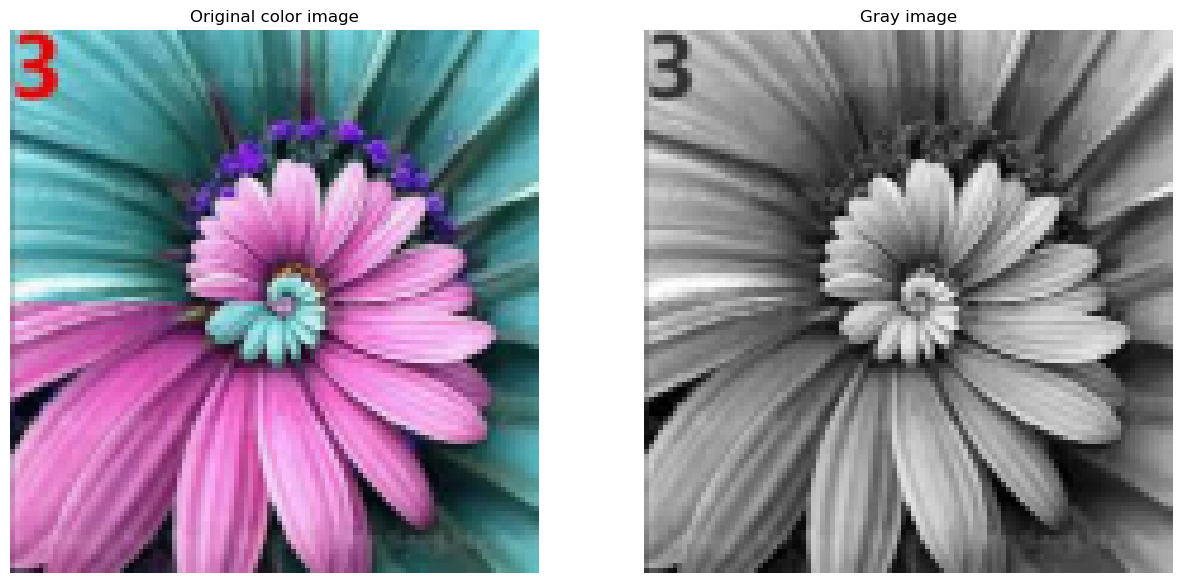

In [43]:
#Compare the contours on the flowers.jpeg

flowers = io.imread('images/flowers.jpeg')

flowers = rescale(flowers,.5, multichannel=True)
flowers_gr = rgb2gray(flowers)
print(flowers.shape)

visualize2(flowers, flowers_gr, 'Original color image', 'Gray image')

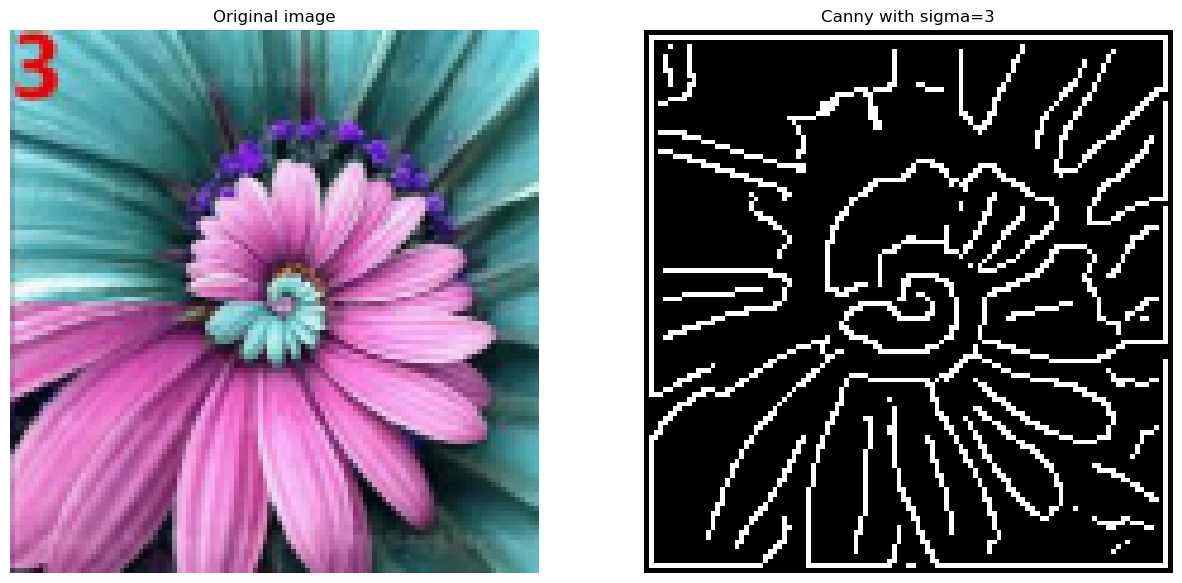

In [44]:
flowers_canny = feature.canny(flowers_gr, sigma=2)
visualize2(flowers,flowers_canny, 'Original image', 'Canny with sigma=3')

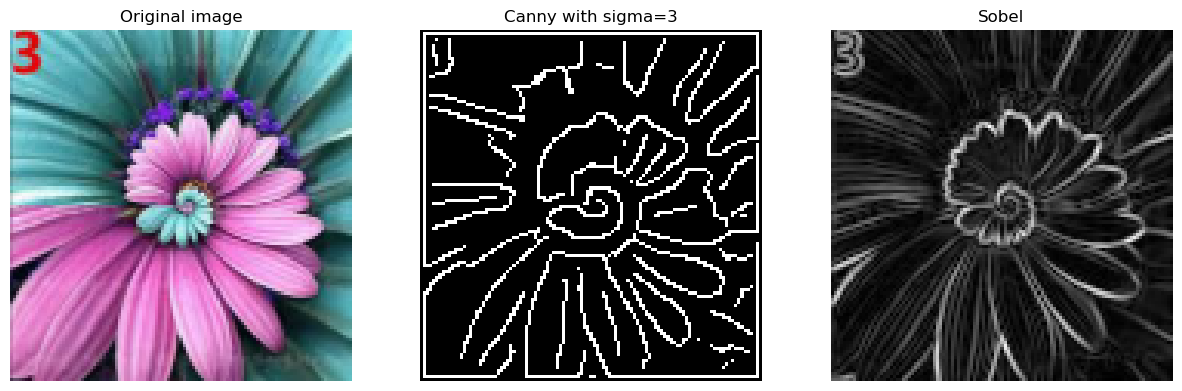

In [45]:
flowers_sobel = filters.sobel(flowers_gr)
visualize3(flowers,flowers_canny, flowers_sobel, 'Original image', 'Canny with sigma=3', 'Sobel')

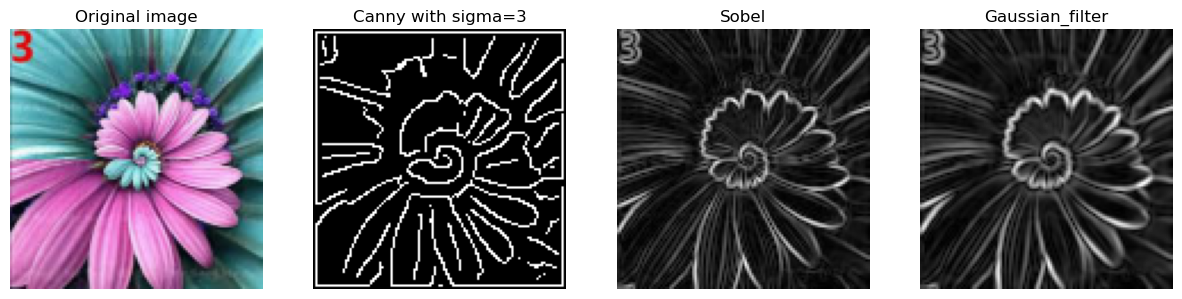

In [46]:
flowers_gaussian01 = gaussian_filter(flowers_gr,sigma=1,order=[0,1])
flowers_gaussian10 = gaussian_filter(flowers_gr,sigma=1,order=[1,0])
flowers_gaussian = magnitude(flowers_gaussian01,flowers_gaussian10)

visualize4(flowers,flowers_canny, flowers_sobel, flowers_gaussian, 'Original image', 'Canny with sigma=3', 'Sobel', 'Gaussian_filter')

What is the difference between different edge detectors? 

**Exercise:** Introduce noise in the image and show how it affects different edge detectors.